# Exploring Willy Wonka

### Introduction

Now that we have properly formatted our data the next step is to our explore our data.  Separate the columns into groups and use our `group_and_print` columns to explore the data.  You may have to adjust it.

Try to get an idea of any trends or insights that can be drawn from the plots.

### Reading prompt

In [20]:
import pandas as pd
from lib import load_data, group_and_print

In [21]:
engine, df = load_data()

### Consider the dimension

In [22]:
user_cols = ['user_age', 'user_gender'] # user_id, order_id
order_cols = ['order_single_item', 'order_date', 'order_item_count']
marketing_cols = ['order_channel', 'order_referrer', 'order_ad_shown', 'order_is_freeshipping', 'order_coupon_code', 'user_loyalty_program']
timing_cols = ['order_day_part', 'order_date', 'month', 'week', 'day_of_week']
location_cols = ['order_store_city', 'order_store_id']


user_age


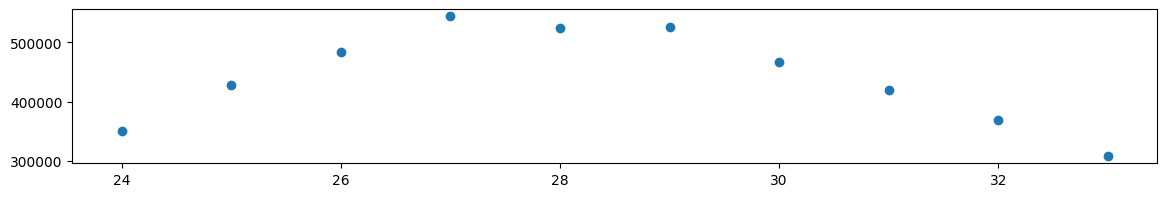

user_gender


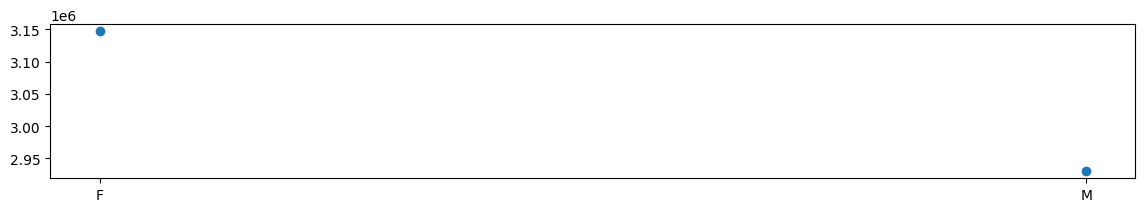

In [25]:
group_and_print('raw_lineitems', user_cols, engine)

order_store_city


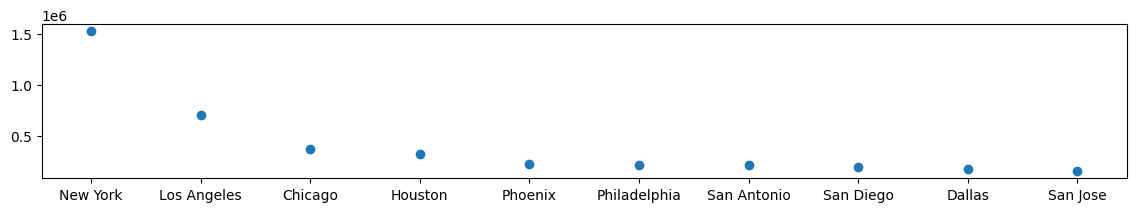

order_store_id


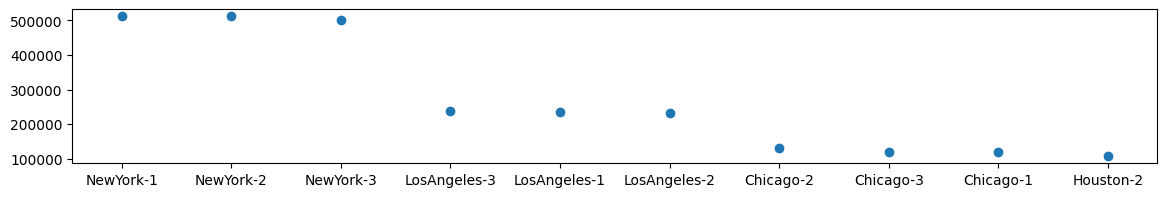

In [26]:
group_and_print('raw_lineitems', location_cols, engine)

order_day_part


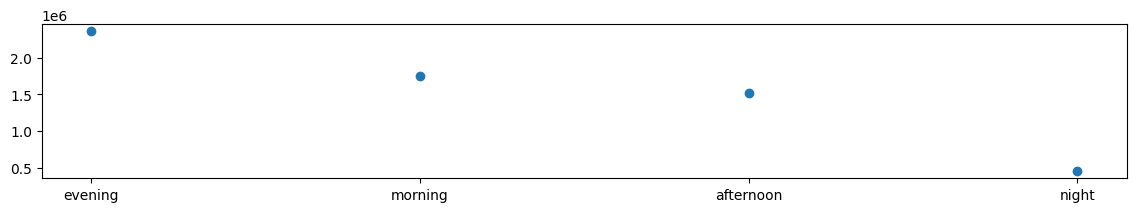

order_date


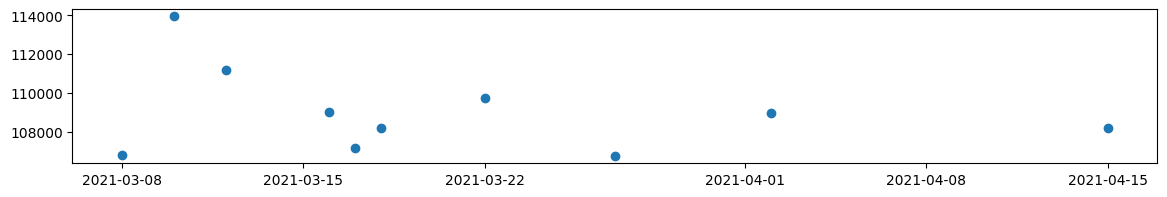

month


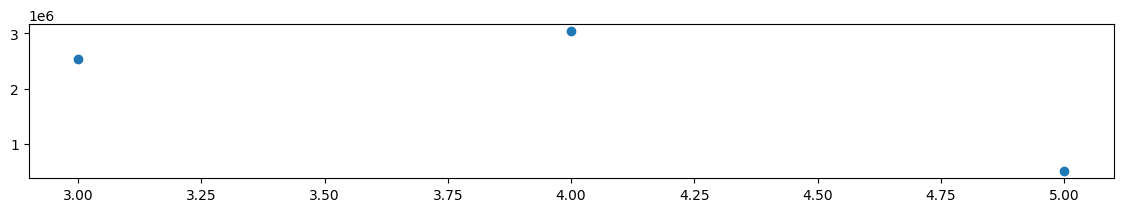

week


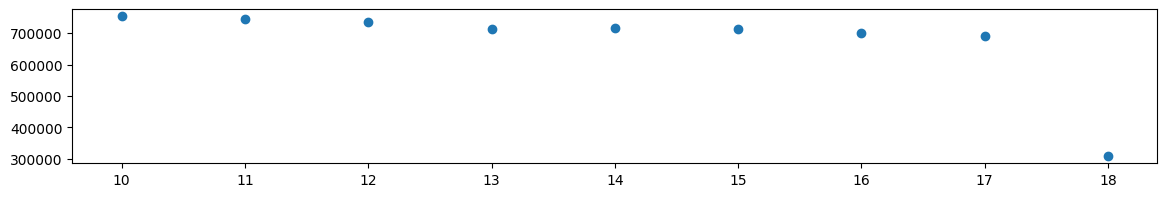

day_of_week


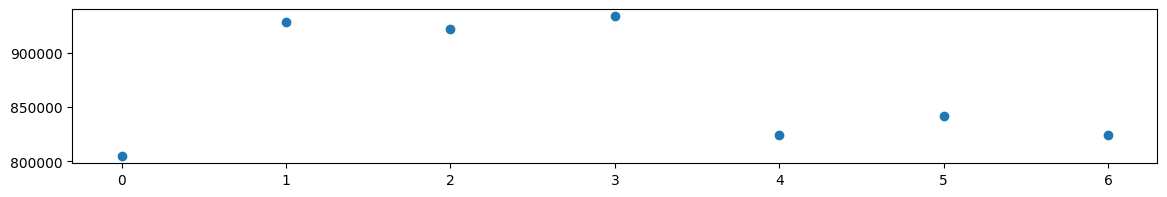

In [27]:
group_and_print('raw_lineitems', timing_cols, engine)

order_channel


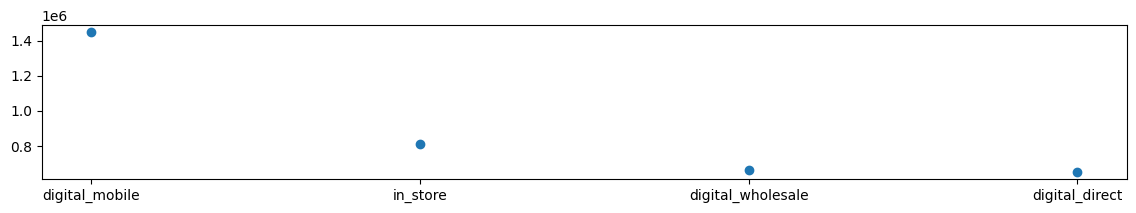

order_referrer


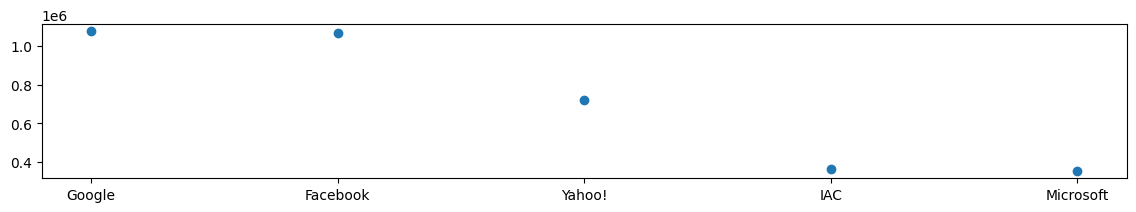

order_ad_shown


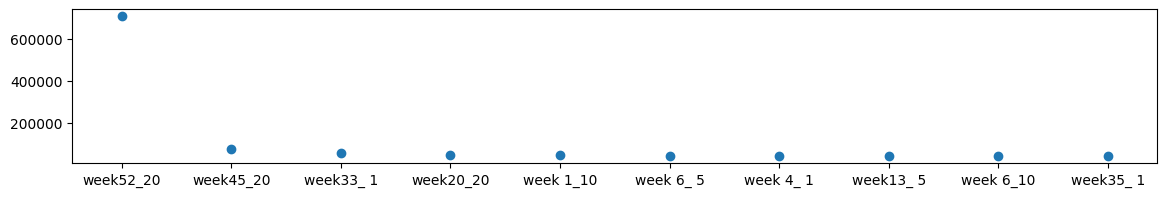

order_is_freeshipping


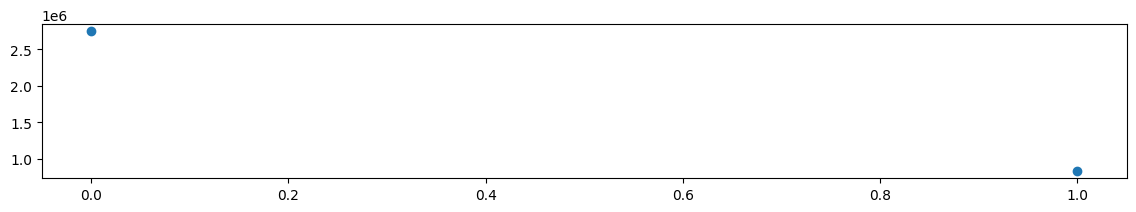

order_coupon_code


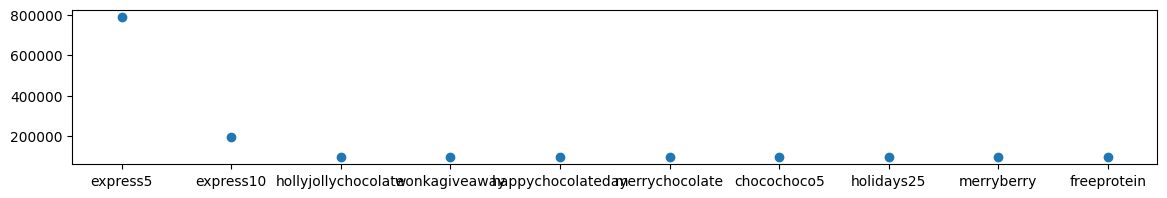

user_loyalty_program


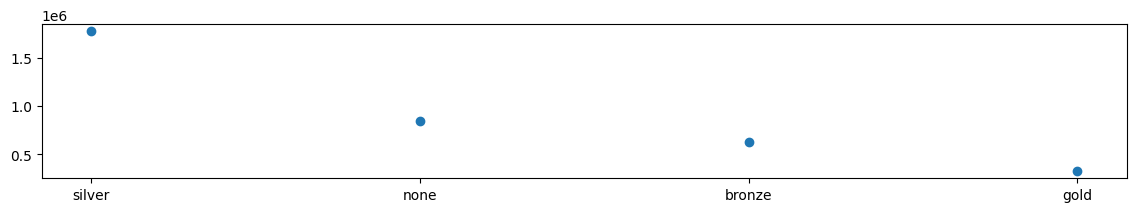

In [15]:
from lib import build_grouped_by, print_grouped_by, group_and_print
marketing_cols = ['order_channel', 'order_referrer', 
'order_ad_shown', 'order_is_freeshipping', 
'order_coupon_code', 'user_loyalty_program']



group_and_print('orders', marketing_cols, engine)


order_store_city


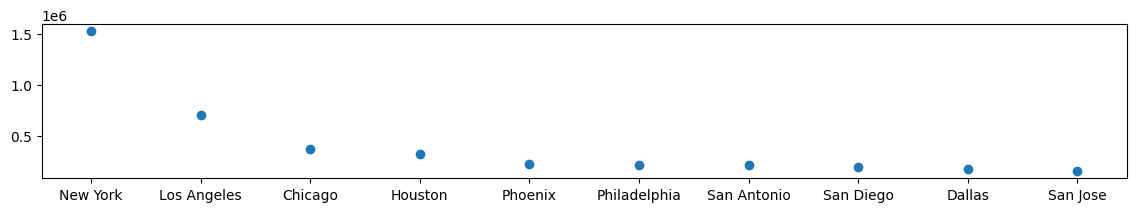

order_store_id


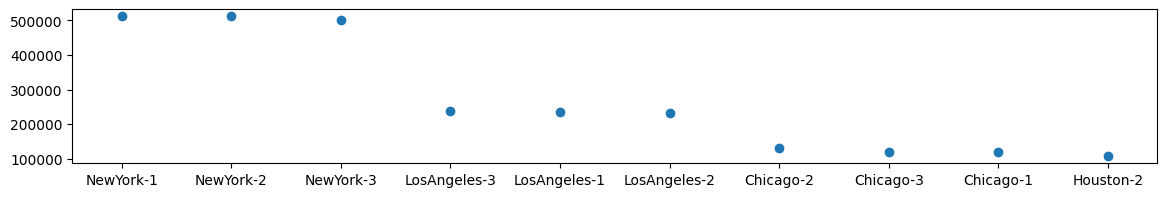

In [28]:
location_cols = ['order_store_city', 'order_store_id']
group_and_print('raw_lineitems', location_cols, engine)

user_age


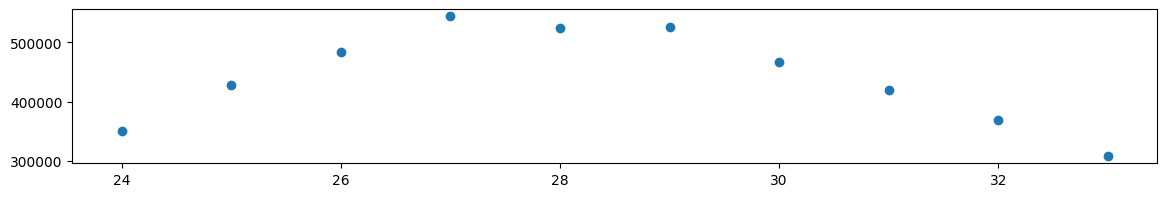

user_gender


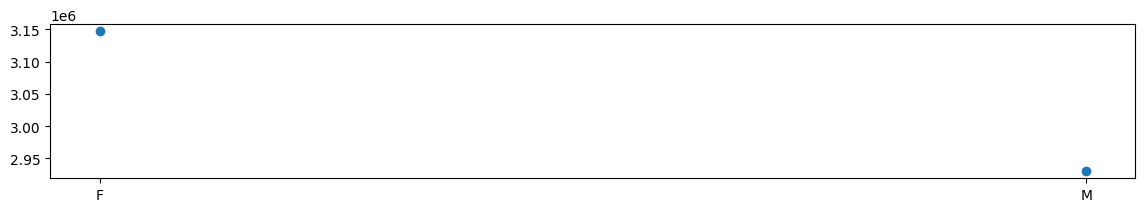

In [29]:
user_cols = ['user_age', 'user_gender']
group_and_print('raw_lineitems', user_cols, engine)

### For Products switch to line items

One issue with the product columns is that if we are calculating the total amount brought in by product and category -- that is highly influenced by the price.  It may be useful just to count the number sold per list_sku, list_sku_category, and list_sku_flavor.  This way we can get a sense of which products are popular -- as opposed to how much money they bring in.  

> This can give us insights as to whether we can adjust the price.  For example, maybe a product brings in more revenue because the price is more, but we could just raise the price of our other products and consumers of those products may also be price insensitive.

To calculate, **write a new function** called `group_and_print_count()` that works like the group_and_print function, but does not calculate total amount per grouping, but just returns the number of times each grouping appeared.

list_sku


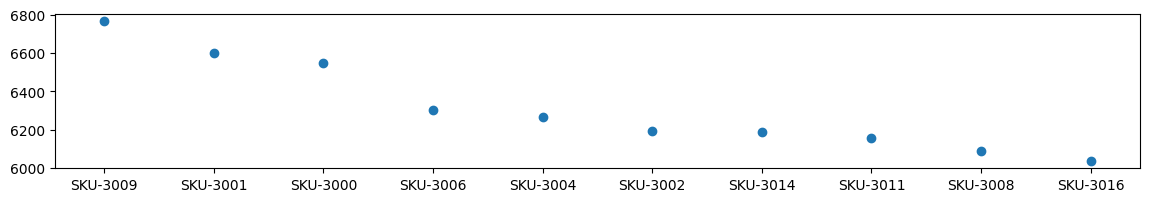

list_sku_category


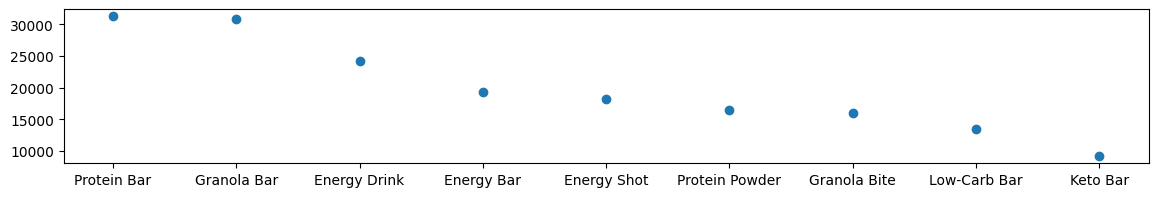

list_sku_flavor


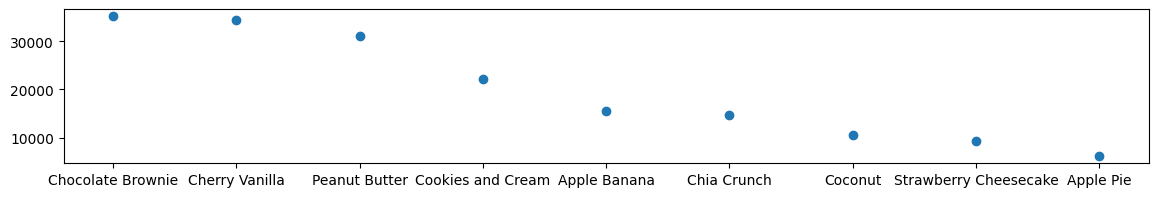

In [30]:
from lib import group_and_print_count
product_cols = ['list_sku', 'list_sku_category', 'list_sku_flavor'] 

group_and_print_count('raw_lineitems', product_cols, engine)

### Dig Deeper with Pivot Table

Let's take another look at the age and gender split.  Use a pandas pivot table to aggregate the order value by age.

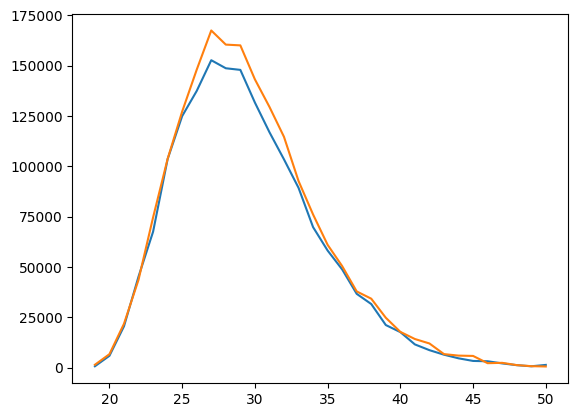

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
table = pd.pivot_table(df, values='order_value',
                    columns=['user_age'], index = ['user_gender'], aggfunc=np.sum, fill_value=0)

f_values = table.loc['F']

m_values = table.loc['M']


plt.plot(table.columns, m_values)
plt.plot(table.columns, f_values)
plt.show()

> The result should look like the following.

<img src="./gender-age-pivot.png" width="40%">

The whole point of this is to get an overview of the data -- and start with some initial insights before digging deeper.  Start broad, and then go narrow.  What do you gather from the initial overview, are there any comoponents you would like to explore further?